/tmp/ipykernel_29741/2459984741.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, rotation=45)


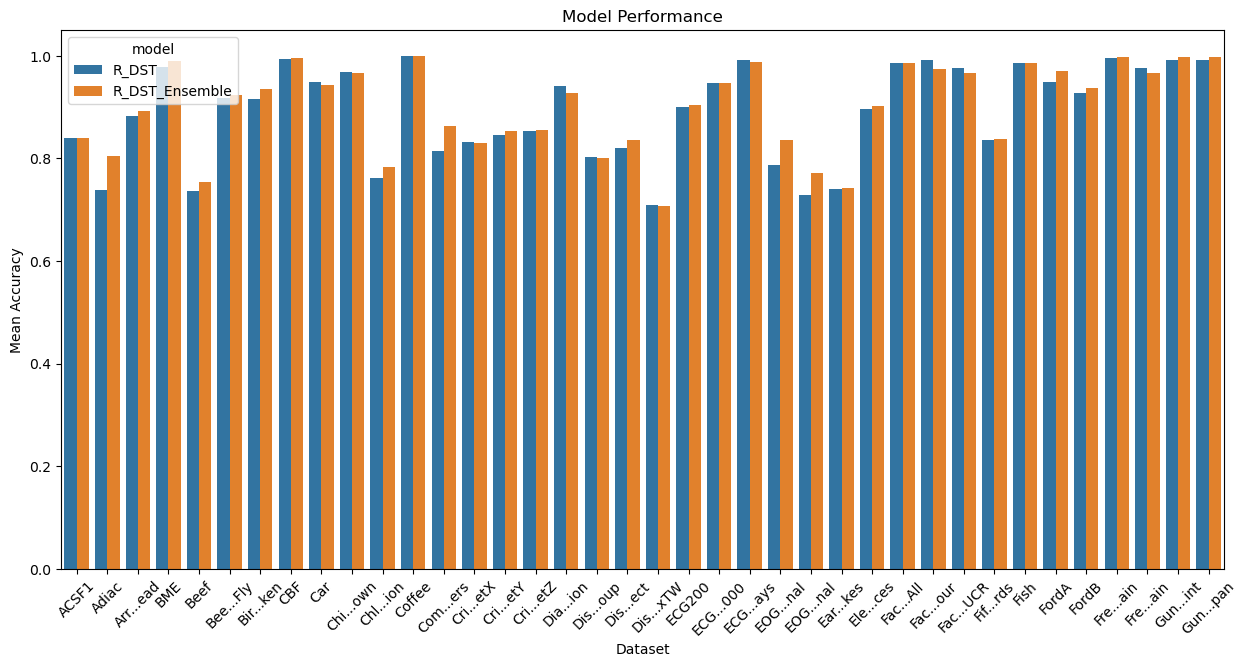

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载CSV文件
df = pd.read_csv('./New_CV_30_results_default.csv')
# 只截取前38个数据集
df = df[df['dataset'].isin(df['dataset'].unique()[:38])]

# 创建一个新的DataFrame，其中包含每个模型在每个数据集上的平均准确率
df_mean = df.groupby(['dataset', 'model'])['acc_mean'].mean().unstack().reset_index()

# 使用seaborn绘制条形图
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df_mean.melt(id_vars='dataset', value_name='acc_mean', var_name='model'), x='dataset', y='acc_mean', hue='model')
plt.title('Model Performance')
plt.xlabel('Dataset')
plt.ylabel('Mean Accuracy')

# 截取并显示部分x轴标签
new_labels = [label[:3] + '...' + label[-3:] if len(label) > 6 else label for label in df_mean['dataset']]
ax.set_xticklabels(new_labels, rotation=45)

# 显示图表
plt.show()


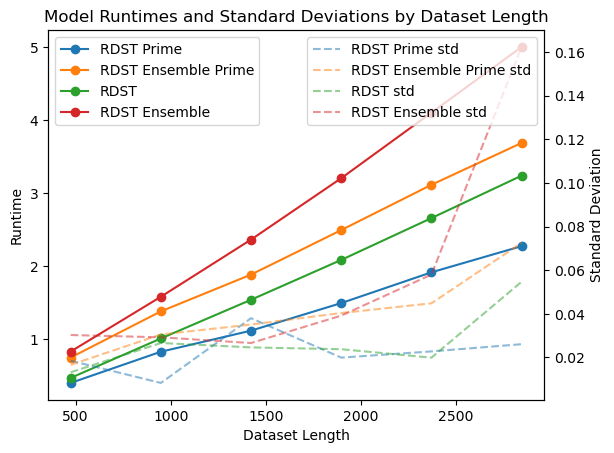

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('./benchmark.csv')

# 提取数据
lengths = df.iloc[:, 0].values
models = ['RDST Prime', 'RDST Ensemble Prime', 'RDST', 'RDST Ensemble']
runtimes = df.iloc[:, 1:5]
stds = df.iloc[:, 5:9]

# 创建图表
fig, ax1 = plt.subplots()

# 绘制运行时间
for i in range(len(models)):
    ax1.plot(lengths, runtimes.iloc[:, i], marker='o', label=models[i])

# 添加标签
ax1.set_xlabel('Dataset Length')
ax1.set_ylabel('Runtime')
ax1.set_title('Model Runtimes and Standard Deviations by Dataset Length')

# 显示图例
ax1.legend(loc='upper left')

# 创建第二个y轴并绘制标准差
ax2 = ax1.twinx()
for i in range(len(models)):
    ax2.plot(lengths, stds.iloc[:, i], linestyle='dashed', label=models[i] + ' std', alpha=0.5)

# 添加标签
ax2.set_ylabel('Standard Deviation')

# 显示图例
ax2.legend(loc='upper right')

# 显示图表
plt.show()


/tmp/ipykernel_2255/3212886942.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/tmp/ipykernel_2255/3212886942.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_2255/3212886942.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


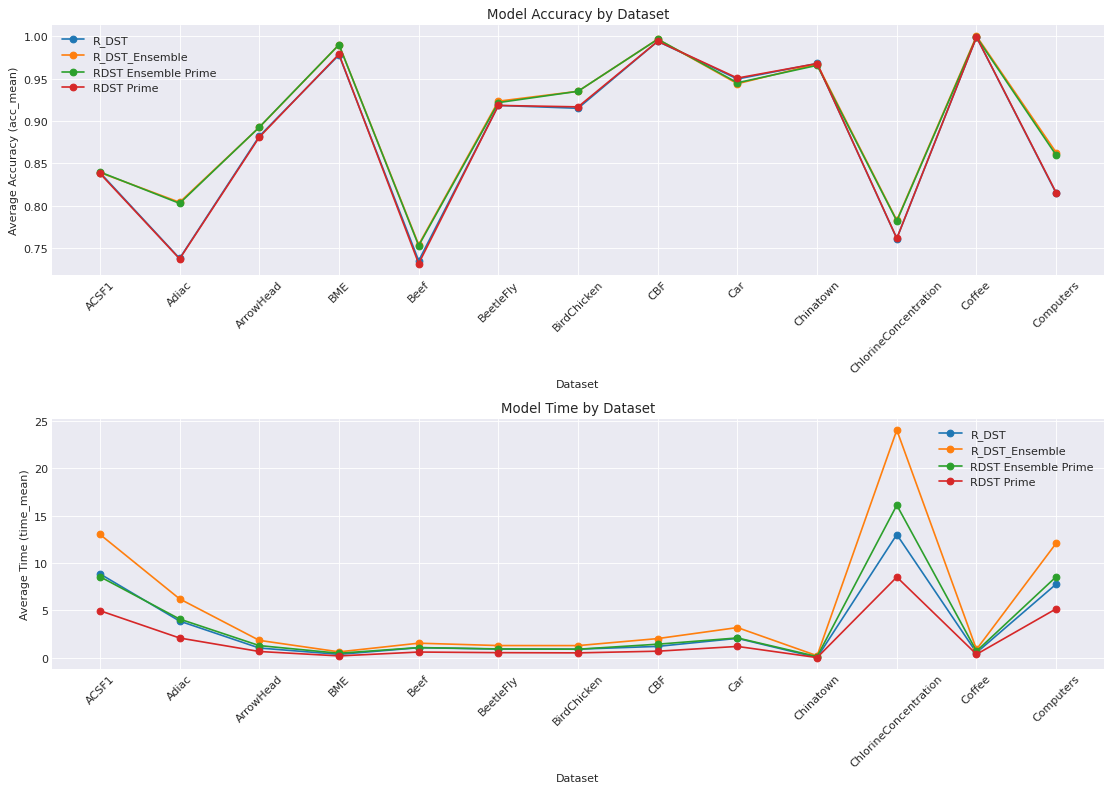

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件的前10行
df1 = pd.read_csv('./New_CV_30_results_default.csv', nrows=26)
df2 = pd.read_csv('../CV_30_results_default.csv', nrows=26)

# 合并数据
result = pd.concat([df1, df2])

# 对数据进行排序，确保dataset是按照一定的顺序排列的
result = result.sort_values('dataset')

# 按模型筛选数据
models = result['model'].unique()
datasets = result['dataset'].unique()

# 设置图表大小和风格
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), dpi=80)

# 绘制每个模型的准确率折线图
for model in models:
    model_data = result[result['model'] == model]
    axes[0].plot(model_data['dataset'], model_data['acc_mean'], marker='o', label=model)

# 设定图表的属性
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

axes[0].set_title('Model Accuracy by Dataset')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Average Accuracy (acc_mean)')
axes[0].legend()

# 绘制每个模型的时间折线图
for model in models:
    model_data = result[result['model'] == model]
    axes[1].plot(model_data['dataset'], model_data['time_mean'], marker='o', label=model)

# 设定图表的属性
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_title('Model Time by Dataset')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Average Time (time_mean)')
axes[1].legend()

# 调整子图间距
plt.tight_layout()

# 显示图表
plt.show()
